In [1]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import logging
logging.getLogger('pvlib').setLevel(logging.DEBUG)

import pvlib

In [2]:
times = pd.date_range('2014-01-01', '2015-01-01', freq='1D')

In [3]:
pvlib.irradiance.extraradiation(300, method='asce')

DEBUG:pvlib:irradiance.extraradiation()
DEBUG:pvlib:Calculating ET rad using ASCE method


1385.7848051831807

In [4]:
pvlib.irradiance.extraradiation(300, method='spencer')

DEBUG:pvlib:irradiance.extraradiation()
DEBUG:pvlib:Calculating ET rad using Spencer method


1384.3999948908033

In [5]:
pvlib.irradiance.extraradiation(300, method='pyephem')

DEBUG:pvlib:irradiance.extraradiation()
DEBUG:pvlib:Calculating ET rad using pyephem method
DEBUG:pvlib:solarposition.pyephem_earthsun_distance()


2014-10-27    1382.618665
dtype: float64

In [6]:
spencer = pd.Series(pvlib.irradiance.extraradiation(times.dayofyear, method='spencer'), times)
asce = pd.Series(pvlib.irradiance.extraradiation(times.dayofyear, method='asce'), times)
ephem = pvlib.irradiance.extraradiation(times, method='pyephem')

DEBUG:pvlib:irradiance.extraradiation()
DEBUG:pvlib:Calculating ET rad using Spencer method
DEBUG:pvlib:irradiance.extraradiation()
DEBUG:pvlib:Calculating ET rad using ASCE method
DEBUG:pvlib:irradiance.extraradiation()
DEBUG:pvlib:Calculating ET rad using pyephem method
DEBUG:pvlib:solarposition.pyephem_earthsun_distance()


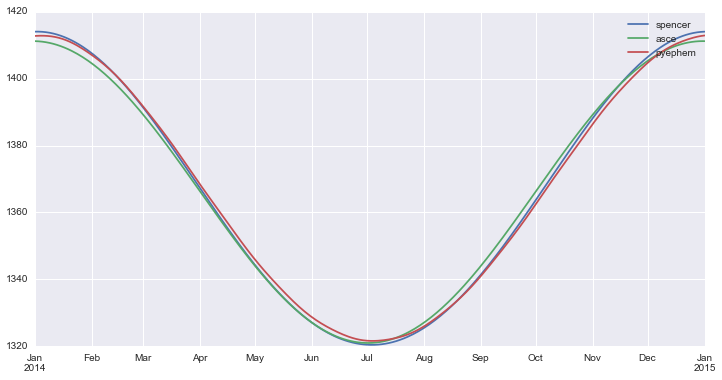

In [7]:
plt.figure(figsize=(12,6))
spencer.plot(label='spencer')
asce.plot(label='asce')
ephem.plot(label='pyephem')
plt.legend();

In [8]:
logging.getLogger('pvlib').setLevel(logging.WARNING)

In [9]:
%%timeit

spencer = pd.Series(pvlib.irradiance.extraradiation(times.dayofyear, method='spencer'), times)

1000 loops, best of 3: 206 µs per loop


In [10]:
%%timeit

asce = pd.Series(pvlib.irradiance.extraradiation(times.dayofyear, method='asce'), times)

10000 loops, best of 3: 165 µs per loop


In [11]:
%%timeit

ephem = pvlib.irradiance.extraradiation(times, method='pyephem')

100 loops, best of 3: 18.4 ms per loop


## Python and [module versions, and dates](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)

In [12]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas, pvlib

Software versions
Python 2.7.8 32bit [MSC v.1500 32 bit (Intel)]
IPython 3.2.0
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pandas 0.16.2
pvlib 0.2.1dev
Sun Jul 12 19:47:17 2015 South Africa Standard Time